Face detection

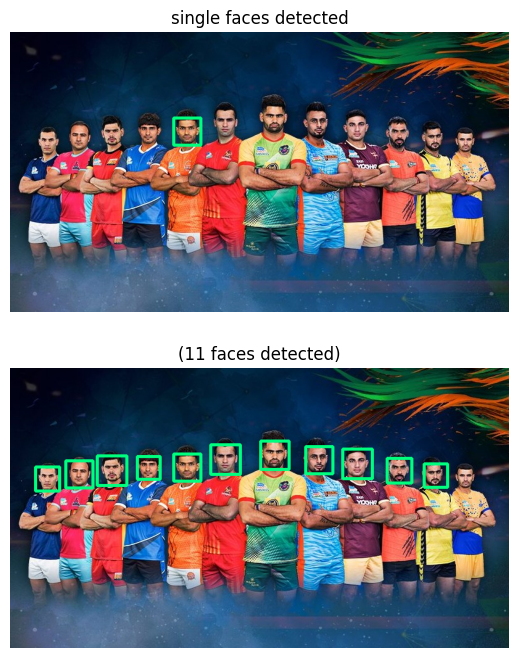

In [1]:
import cv2
import matplotlib.pyplot as plt

class FaceDetector:
    def __init__(self, faceCascadePath):
        self.faceCascade = cv2.CascadeClassifier(faceCascadePath)
        if self.faceCascade.empty():
            raise IOError("Error: Cascade file not found or failed to load!")

    def detect(self, image, scaleFactor=1.1, minNeighbors=5, minSize=(30,30)):
        rects = self.faceCascade.detectMultiScale(image,
                                                  scaleFactor=scaleFactor,
                                                  minNeighbors=minNeighbors,
                                                  minSize=minSize)
        return rects

# Use OpenCV’s built-in Haar Cascade path
frontal_cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
fd = FaceDetector(frontal_cascade_path)

# Load image
img = cv2.imread(r"c:\Users\prasa\OneDrive\Documents\Desktop\Desktop\Pro-Kabaddi-League-Captains.jpg")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = fd.detect(gray, scaleFactor=1.2, minNeighbors=5)

# --- Single face detection (first face only) ---
img_single = img.copy()
if len(faces) > 0:
    (x, y, w, h) = faces[8]   # take the first detected face
    cv2.rectangle(img_single, (x, y), (x+w, y+h), (127, 255, 0), 3)
'''
Draws a rectangle around the chosen face on img_single.
(x, y) → top‑left corner of the rectangle.
(x+w, y+h) → bottom‑right corner of the rectangle.
(127, 255, 0) → color of the rectangle in BGR format (greenish).
3 → thickness of the rectangle border.'''

# --- Multi-face detection (all faces) ---
img_multi = img.copy()
for (x, y, w, h) in faces:
    cv2.rectangle(img_multi, (x, y), (x+w, y+h), (127, 255, 0), 3)

# Show results side by side
plt.figure(figsize=(16,8))

plt.subplot(2,1,1)
plt.imshow(cv2.cvtColor(img_single, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title(f"single faces detected")

plt.subplot(2,1,2)
plt.imshow(cv2.cvtColor(img_multi, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title(f"({len(faces)} faces detected)")

plt.show()


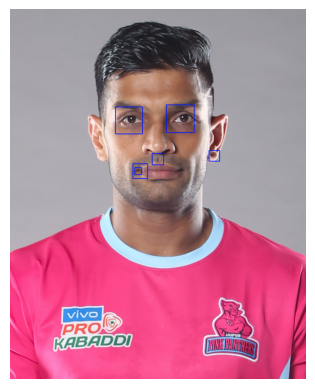

In [22]:
import cv2
import matplotlib.pyplot as plt

# Load the eye cascade
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

def detect_eyes(img):
    eye_img = img.copy()
    # Convert to grayscale for detection
    gray = cv2.cvtColor(eye_img, cv2.COLOR_BGR2GRAY)
    
    # Detect eyes
    eye_rect = eye_cascade.detectMultiScale(gray, scaleFactor=1.2)
    
    # Draw rectangles around detected eyes
    for (x, y, w, h) in eye_rect:
        cv2.rectangle(eye_img, (x, y), (x + w, y + h), (515, 25,0), 2)
        
    return eye_img

# Apply detection
img1 = cv2.imread(r"c:\Users\prasa\OneDrive\Documents\Desktop\Desktop\mnist testing pics\MV5BNWQ0YWQ4MWYtODYwNy00MWRiLTg2OTctZDdkYWU2YWI1MzAyXkEyXkFqcGc@._V1_.jpg")

# Detect faces
eyes = detect_eyes(img1)

# Display result
plt.imshow(cv2.cvtColor(eyes, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


1.Image sharpness

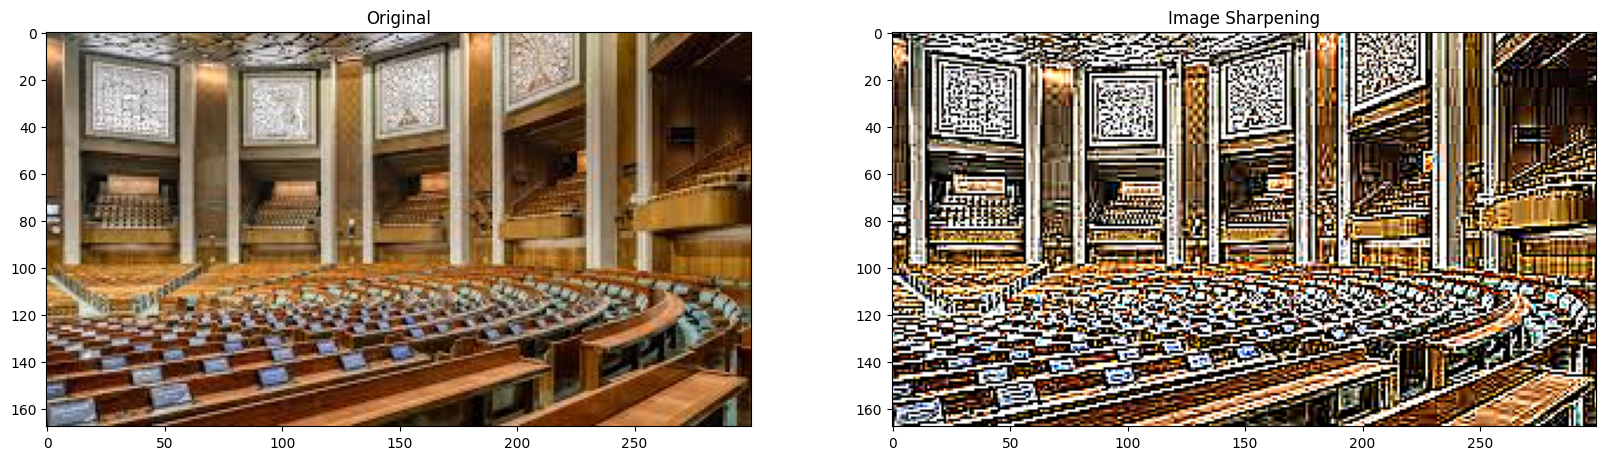

In [ ]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load with Pillow
image = Image.open(r'c:\Users\prasa\OneDrive\Documents\Desktop\Desktop\images.jpg')

# Convert to NumPy array
image = np.array(image)

# Convert to BGR for OpenCV if needed
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# Sharpening kernel
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])

sharpened = cv2.filter2D(image, -1, kernel_sharpening)

plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Image Sharpening")
plt.imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))
plt.show()


2.Thresholding, Binarization & Adaptive Thresholding¶


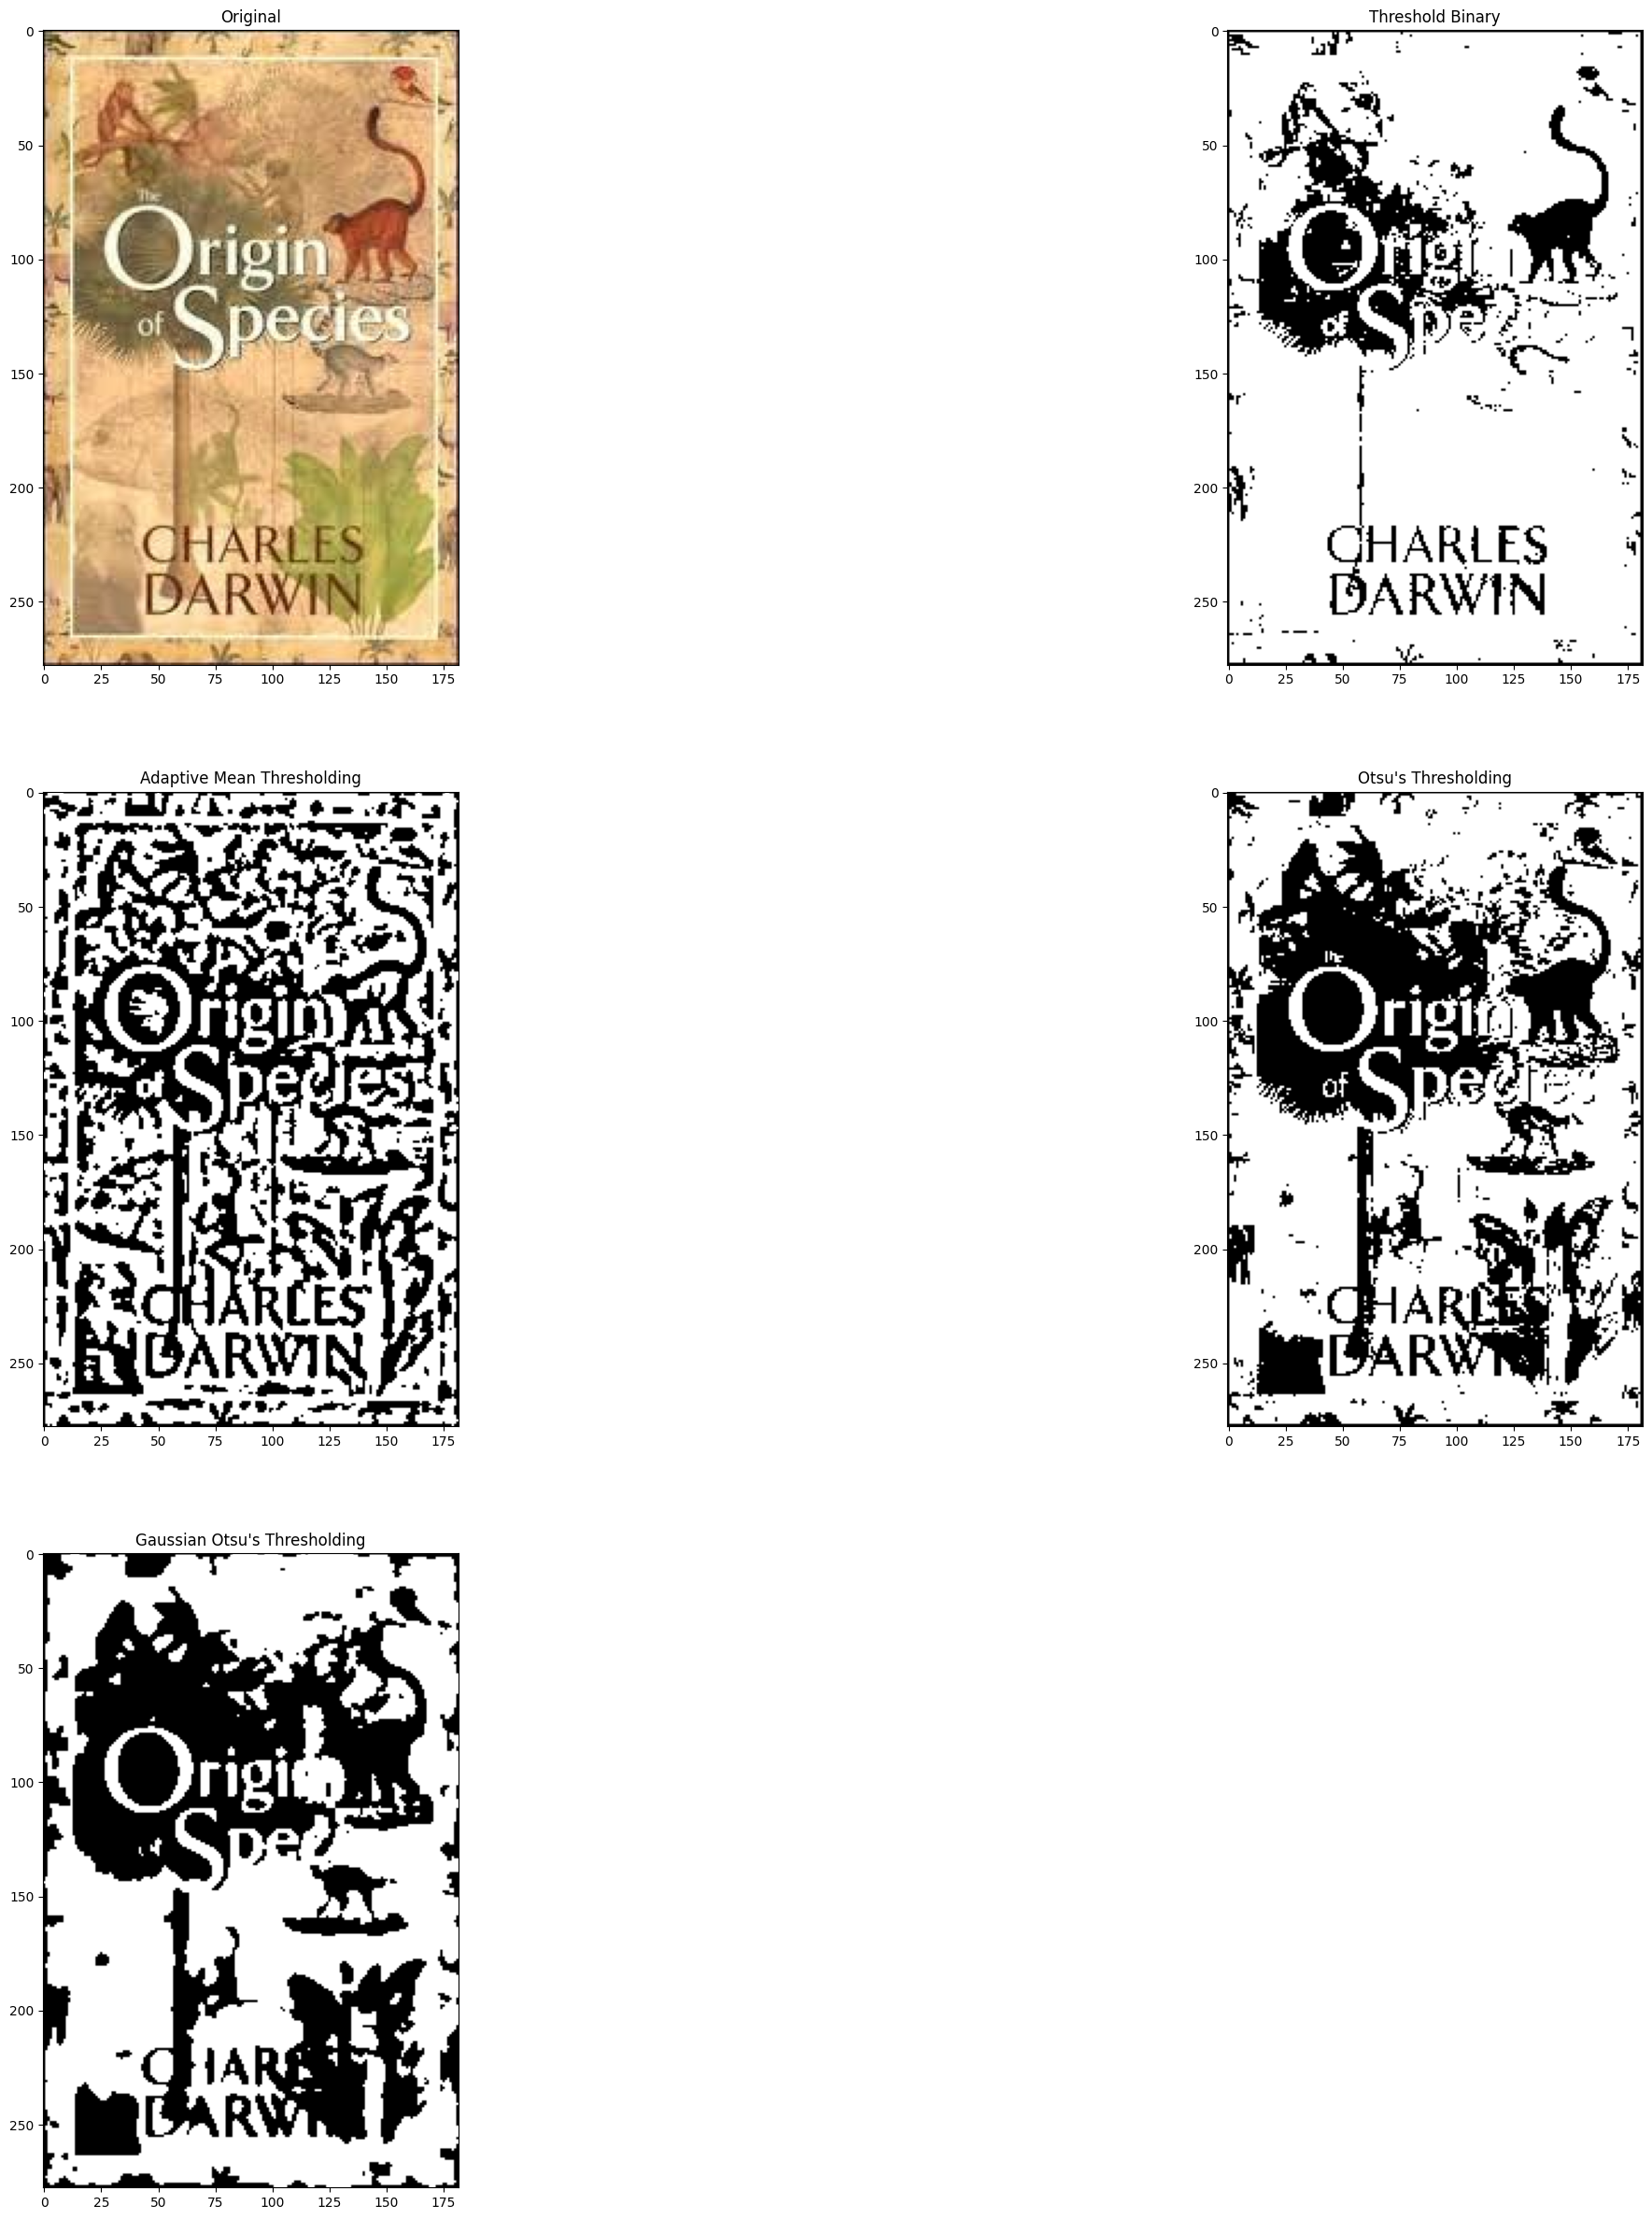

In [51]:
import cv2
import matplotlib.pyplot as plt

# Load image
image = cv2.imread(r"c:\Users\prasa\OneDrive\Documents\Desktop\Desktop\download.jpg")

plt.figure(figsize=(30, 30))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Simple binary threshold
_, thresh1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
plt.subplot(3, 2, 2)
plt.title("Threshold Binary")
plt.imshow(thresh1, cmap='gray')

# Blur grayscale image
blur = cv2.GaussianBlur(gray, (3, 3), 0)

# Adaptive threshold
thresh2 = cv2.adaptiveThreshold(blur, 255,
                                cv2.ADAPTIVE_THRESH_MEAN_C,
                                cv2.THRESH_BINARY, 11, 2)
plt.subplot(3, 2, 3)
plt.title("Adaptive Mean Thresholding")
plt.imshow(thresh2, cmap='gray')

# Otsu's thresholding
_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.subplot(3, 2, 4)
plt.title("Otsu's Thresholding")
plt.imshow(th2, cmap='gray')

# Otsu's after Gaussian filtering
blur2 = cv2.GaussianBlur(gray, (5,5), 0)
_, th3 = cv2.threshold(blur2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.subplot(3, 2, 5)
plt.title("Gaussian Otsu's Thresholding")
plt.imshow(th3, cmap='gray')

plt.show()


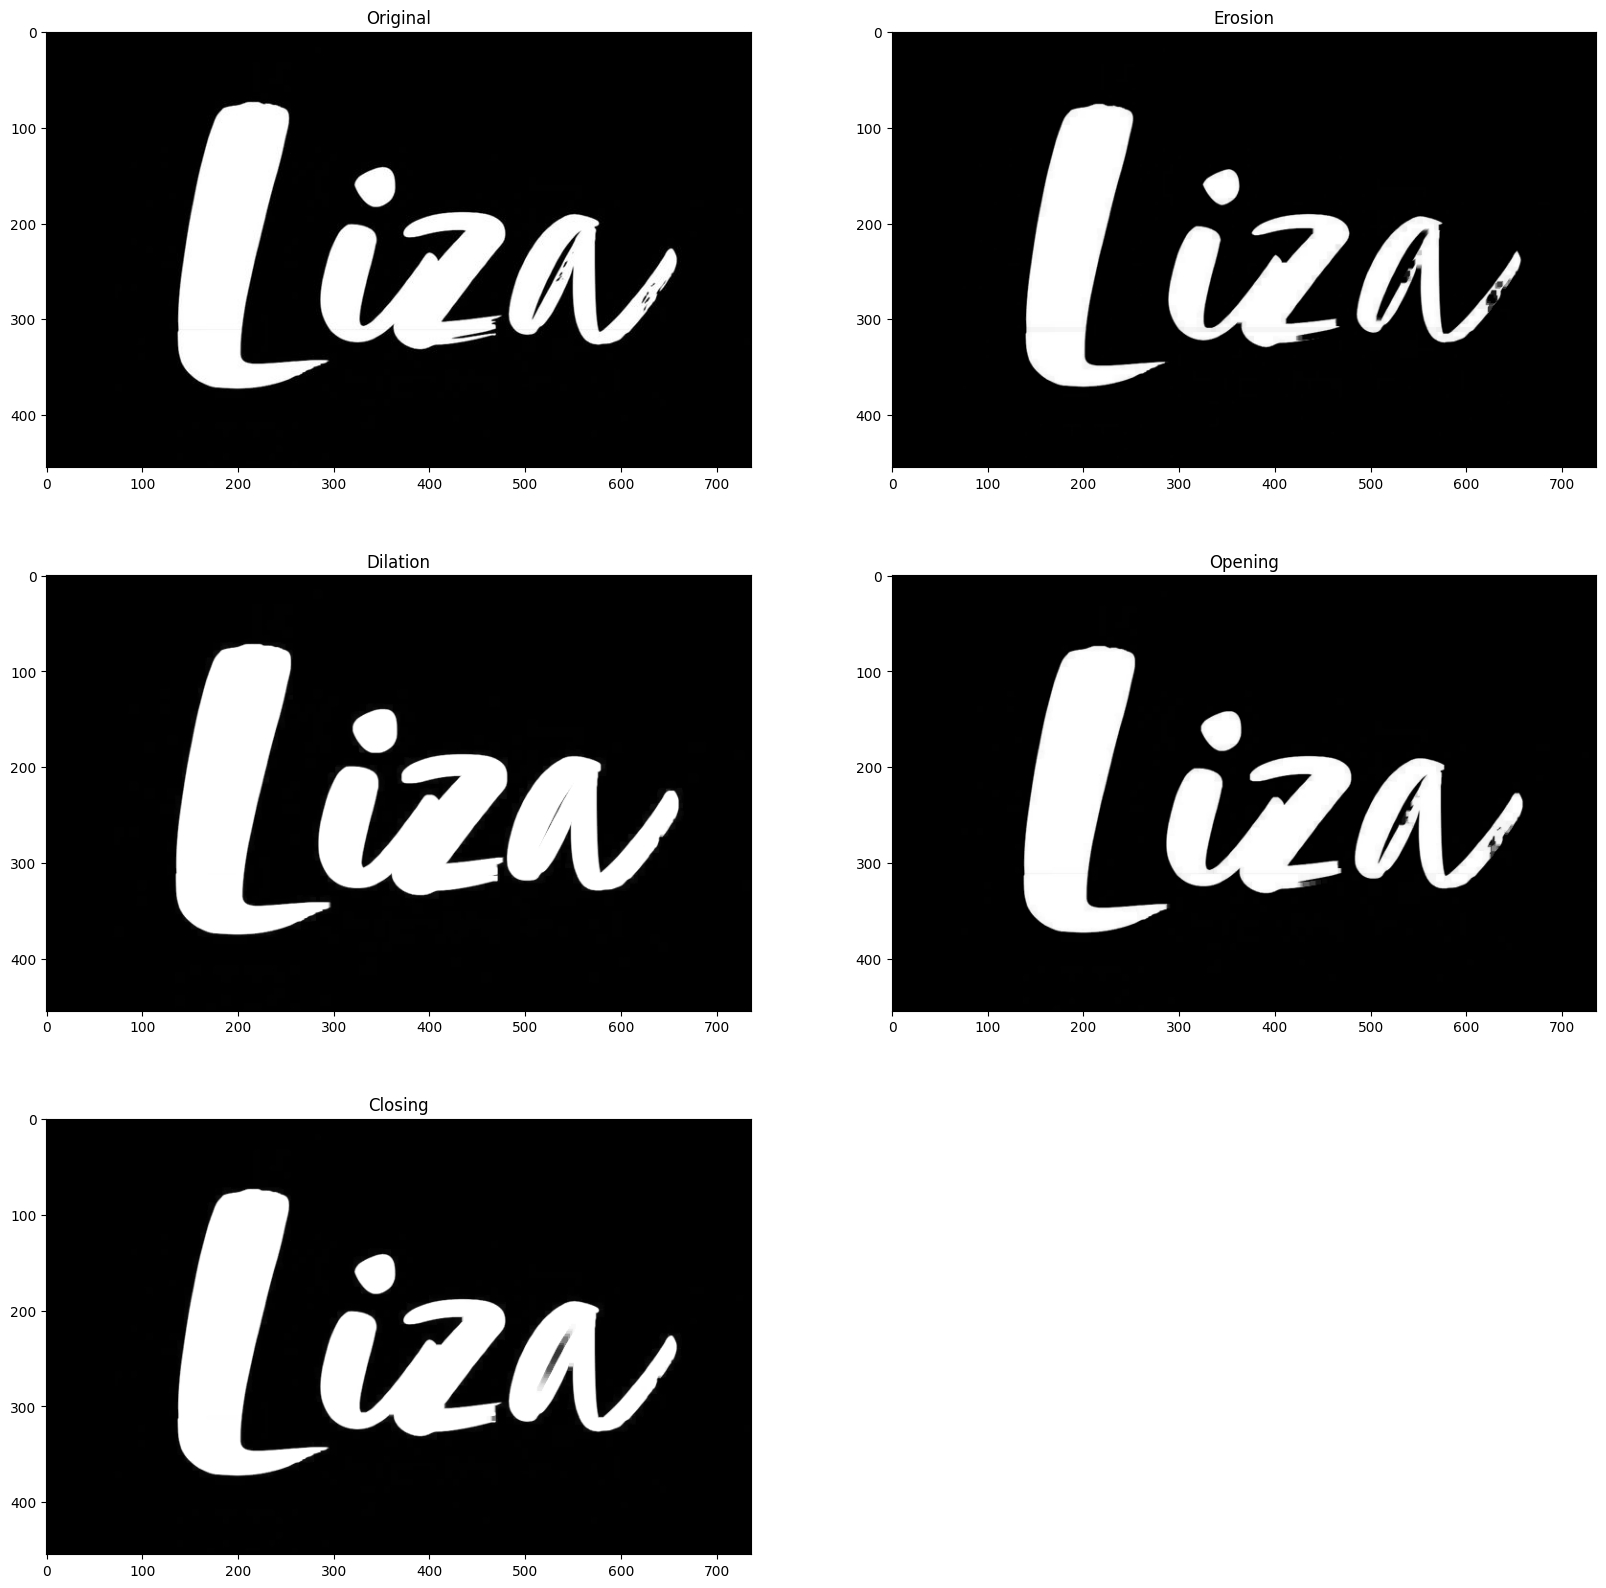

In [ ]:
image = cv2.imread(r"c:\Users\prasa\OneDrive\Documents\Desktop\Desktop\ebdee466032c677d86e2489885d631e6.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)


# Let's define our kernel size
kernel = np.ones((5,5), np.uint8)

# Now we erode
erosion = cv2.erode(image, kernel, iterations = 1)

plt.subplot(3, 2, 2)
plt.title("Erosion")
plt.imshow(erosion)

# dilation
dilation = cv2.dilate(image, kernel, iterations = 1)
plt.subplot(3, 2, 3)
plt.title("Dilation")
plt.imshow(dilation)


# Opening - Good for removing noise
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
plt.subplot(3, 2, 4)
plt.title("Opening")
plt.imshow(opening)


# Closing - Good for removing noise
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
plt.subplot(3, 2, 5)
plt.title("Closing")
plt.imshow(closing)